# Random Allelic Expression in the Human Body
### Stephanie N. Kravitz, Aaron R. Quinlan, Christopher Gregg

## Contents
1. [Figure 4B: Gene Overlap in Humans](#Figure-4B:-Gene-Overlap-in-Humans)
2. [Figure 4C: Gene Overlap in Mouse](#Figure-4C:-Gene-Overlap-in-Mouse-(Huang-et.-al,-2017))
3. [Figure 4F: ChromHMM Core Marks densities in RAE and Biallelic genes](#Figure-4F:-ChromHMM-Core-Marks-densities-in-RAE-and-Biallelic-genes)
4. [Figure 4G: ChromHMM Core Marks per Gene](#Figure-4G:-ChromHMM-Core-Marks-per-Gene)
5. [Figure 4H: promoter-cRE pairs per Gene](#Figure-4H:-promoter-cRE-pairs-per-Gene)
6. [Figure 4I: Number of Enhancers per Gene](#Figure-4I:-Number-of-Enhancers-per-Gene)
7. [Figure 4J: Regulatory Complexity Score](#Figure-4J:-Regulatory-Complexity-Score)
8. [Figure 4K: Subtypes of RAE based on Candidate Mechanisms](#Figure-4K:-Subtypes-of-RAE-based-on-Candidate-Mechanisms)

### Prior to recreating figures, first import necessary libraries and set global plot aesthetics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import f_oneway

plt.rcParams['pdf.fonttype'] = 42

%matplotlib inline
%matplotlib nbagg


## Figure 4B: Gene Overlap in Humans

In [2]:
# Read in data:

df_overlap = pd.read_csv('../data/gene_overlap/GeneOverlap_PearsonResiduals.220321.txt', sep='\t')

df_overlap.head()


,tissue_group,strand,biallelic_false,biallelic_true,rme_false,rme_true,pearson_chisq_pval
0,all-tissues,opposite,1.65,-2.33,-3.75,5.29,1.410000e-12
1,all-tissues,same,0.02,-0.07,-0.05,0.15,8.600000e-01
2,brain-tissues,opposite,1.36,-2.01,-2.85,4.21,1.770000e-08
3,brain-tissues,same,0.29,-1.19,-0.61,2.49,4.490000e-03
4,body-tissues,opposite,1.30,-1.85,-3.19,4.53,2.050000e-09


In [3]:
# Subset opposite strand gene overlap to plot:
df_overlap = df_overlap[df_overlap['strand'] == 'opposite']

## Re-shape dataframe:
df_overlap = df_overlap.melt(id_vars='tissue_group', value_vars=['biallelic_false', 'rme_false', 'biallelic_true', 'rme_true', 'pearson_chisq_pval'], var_name='gene_overlap', value_name='PearsonResiduals')
#print(df.head())

## Remove pearson_chisq_pval rows to format for plot:
df_toPlot = df_overlap[df_overlap['gene_overlap'] != 'pearson_chisq_pval']
df_toPlot

,tissue_group,gene_overlap,PearsonResiduals
0,all-tissues,biallelic_false,1.65
1,brain-tissues,biallelic_false,1.36
2,body-tissues,biallelic_false,1.30
3,all-tissues,rme_false,-3.75
4,brain-tissues,rme_false,-2.85
5,body-tissues,rme_false,-3.19
6,all-tissues,biallelic_true,-2.33
7,brain-tissues,biallelic_true,-2.01
8,body-tissues,biallelic_true,-1.85
9,all-tissues,rme_true,5.29


<IPython.core.display.Javascript object>


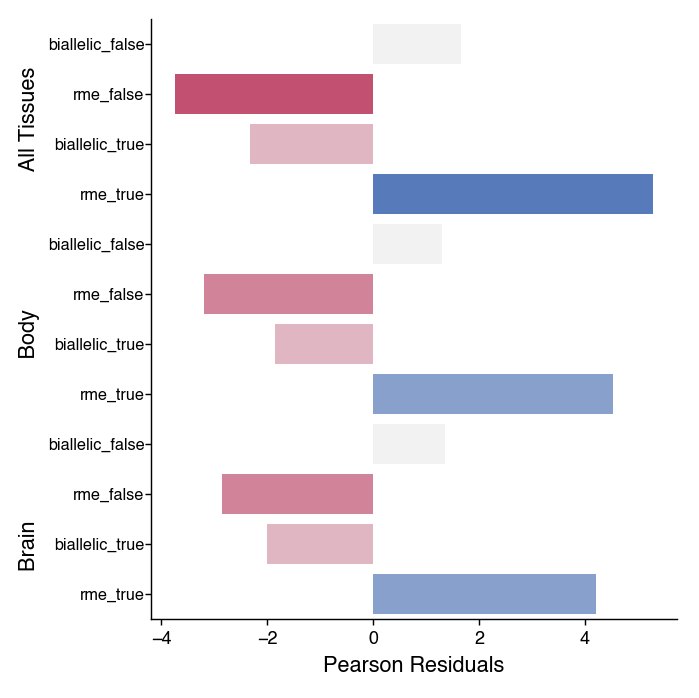

/Users/snkravitz/opt/miniconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, 'Brain                           Body                       All Tissues')

In [4]:
# Make barplot: 
f, ax = plt.subplots(figsize=(3,3), tight_layout=True)
sns.despine()

def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


## Sorting the data:
df_toPlot.gene_overlap = pd.Categorical(df_toPlot.gene_overlap, categories=['biallelic_false', 'rme_false', 'biallelic_true', 'rme_true'])
df_toPlot = df_toPlot.sort_values(by=['tissue_group', 'gene_overlap'])
y = np.array(df_toPlot.sort_values(by=['tissue_group', 'gene_overlap'])['PearsonResiduals'])
df_toPlot['order'] = np.arange(12)


## Generate barplot
ax = sns.barplot(data=df_toPlot.sort_values(by=['tissue_group', 'gene_overlap']), y='order', x='PearsonResiduals', dodge=False, palette=colors_from_values(y, sns.diverging_palette(0, 255, sep=110, n=12)), orient='h')

## Formatting
ax.set_yticklabels(labels=df_toPlot['gene_overlap'], fontdict={'fontsize': 9,'fontweight': 'light'}) 
ax.tick_params(axis='y', which='major', pad=0)
ax.set_xlabel("Pearson Residuals", fontsize=12, fontweight='light')
ax.set_ylabel("Brain                           Body                       All Tissues", fontsize=12, fontweight='light')




## Figure 4C: Gene Overlap in Mouse (Huang et. al, 2017)

In [5]:
# Read in data:

df_mouse = pd.read_csv('../data/gene_overlap/GeneOverlap_Mouse_Stranded_PearsonResiduals.210930.txt', sep='\t')

# Merge Dataset and strand for one column:
df_mouse['group'] = df_mouse['Dataset:'] + '_' + df_mouse['strand'] 

df_mouse.head()


,Dataset:,strand,CoEE_false,CoEE_true,DAEE_false,DAEE_true,p_val,group
0,ADULT_ARN,opposite,0.883402,-1.771622,-0.962194,1.929636,0.003421,ADULT_ARN_opposite
1,ADULT_ARN,same,0.204220,-1.315530,-0.222435,1.432864,0.049013,ADULT_ARN_same
2,ADULT_DRN,opposite,0.665637,-1.363225,-0.746123,1.528060,0.022676,ADULT_DRN_opposite
3,ADULT_DRN,same,0.128238,-0.825060,-0.143744,0.924823,0.209753,ADULT_DRN_same
4,P15_DRN,opposite,0.770123,-1.549430,-0.808018,1.625672,0.012145,P15_DRN_opposite


In [6]:
## Re-shape dataframe:
df_mouse = df_mouse.melt(id_vars=['group', 'strand'], value_vars=['CoEE_false', 'CoEE_true', 'DAEE_false', 'DAEE_true', 'p_val'], var_name='gene_overlap', value_name='PearsonResiduals')

# remove p-val column for now:
df_toPlot_mouse = df_mouse[df_mouse['gene_overlap'] != 'p_val']

df_toPlot_mouse


,group,strand,gene_overlap,PearsonResiduals
0,ADULT_ARN_opposite,opposite,CoEE_false,0.883402
1,ADULT_ARN_same,same,CoEE_false,0.204220
2,ADULT_DRN_opposite,opposite,CoEE_false,0.665637
3,ADULT_DRN_same,same,CoEE_false,0.128238
4,P15_DRN_opposite,opposite,CoEE_false,0.770123
5,P15_DRN_same,same,CoEE_false,0.117896
6,ADULT_LIVER_opposite,opposite,CoEE_false,0.363430
7,ADULT_LIVER_same,same,CoEE_false,0.159531
8,ADULT_MUSCLE_opposite,opposite,CoEE_false,1.095082
9,ADULT_MUSCLE_same,same,CoEE_false,0.089781


In [7]:
## Format data for plotting:
df_toPlot_mouse.gene_overlap = pd.Categorical(df_toPlot_mouse.gene_overlap, categories=['CoEE_false', 'CoEE_true', 'DAEE_false', 'DAEE_true'])
df_toPlot_mouse = df_toPlot_mouse.sort_values(by=['strand', 'group', 'gene_overlap'])

## Separate Opposite and Same strand overlap for plotting: 
df_opposite = df_toPlot_mouse[df_toPlot_mouse['strand'] == 'opposite']
y = np.array(df_opposite.sort_values(by=['strand', 'group', 'gene_overlap'])['PearsonResiduals'])
df_opposite['order'] = np.arange(20)
#print(df_opposite)

## For same-strand overlap:
#df_same = df_toPlot_mouse[df_toPlot_mouse['strand'] == 'same']
#y = np.array(df_same.sort_values(by=['strand', 'group', 'gene_overlap'])['PearsonResiduals'])
#df_same['order'] = np.arange(20)
#print(df_same)


/Users/snkravitz/opt/miniconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/var/folders/1t/rgnnsnln1v98rl8dvwy4q2kh0000gn/T/ipykernel_56496/3253777008.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_opposite['order'] = np.arange(20)


<IPython.core.display.Javascript object>


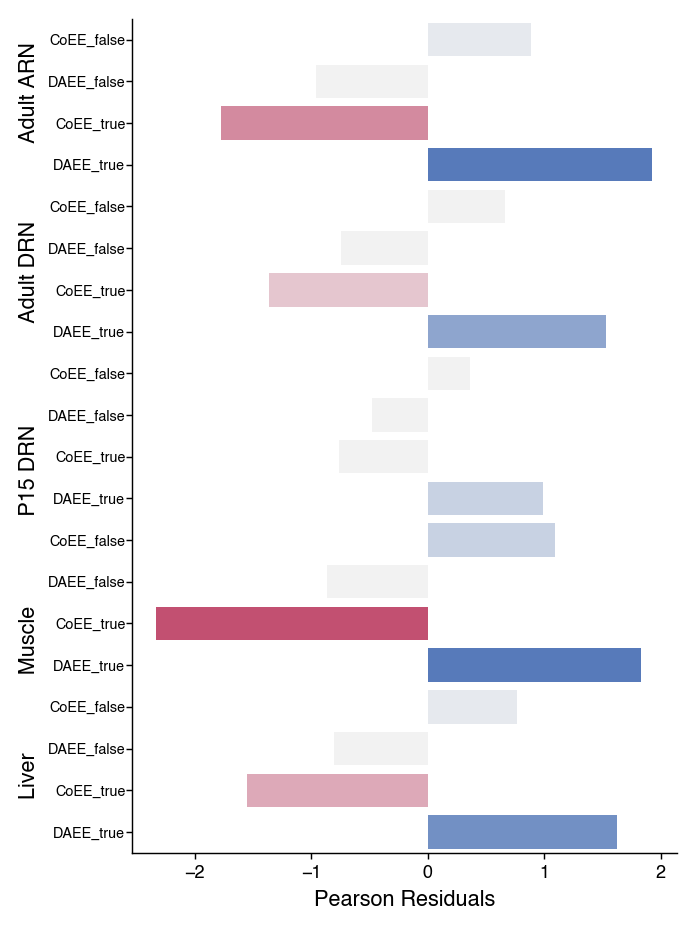

Text(0, 0.5, '        Liver             Muscle               P15 DRN                 Adult DRN             Adult ARN   ')

In [8]:
## Make barplots of Pearson Residuals for Mouse:

df_toPlot = df_opposite

f, ax = plt.subplots(figsize=(3,4), tight_layout=True)
sns.despine()

def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

## Both strands on Same Plot:
df_toPlot.gene_overlap = pd.Categorical(df_toPlot.gene_overlap, categories=['CoEE_false', 'DAEE_false', 'CoEE_true', 'DAEE_true'])
df_toPlot = df_toPlot.sort_values(by=['strand', 'group', 'gene_overlap'])
y = np.array(df_toPlot.sort_values(by=['strand', 'group', 'gene_overlap'])['PearsonResiduals'])
df_toPlot['order'] = np.arange(20)

ax = sns.barplot(data=df_toPlot, y='order', x='PearsonResiduals', dodge=False, palette=colors_from_values(y, sns.diverging_palette(0, 255, sep=110, n=20)), orient='h')

# Custom X axis
ax.set_yticklabels(labels=df_toPlot['gene_overlap'], fontdict={'fontsize': 8,'fontweight': 'light'}) #, 'rotation': 45, 'ha': 'right'})
ax.tick_params(axis='y', which='major', pad=0)
ax.set_xlabel("Pearson Residuals", fontsize=12, fontweight='light')
ax.set_ylabel("        Liver             Muscle               P15 DRN                 Adult DRN             Adult ARN   ", fontsize=12, fontweight='light')



## Figure 4F: ChromHMM Core Marks densities in RAE and Biallelic genes

<IPython.core.display.Javascript object>


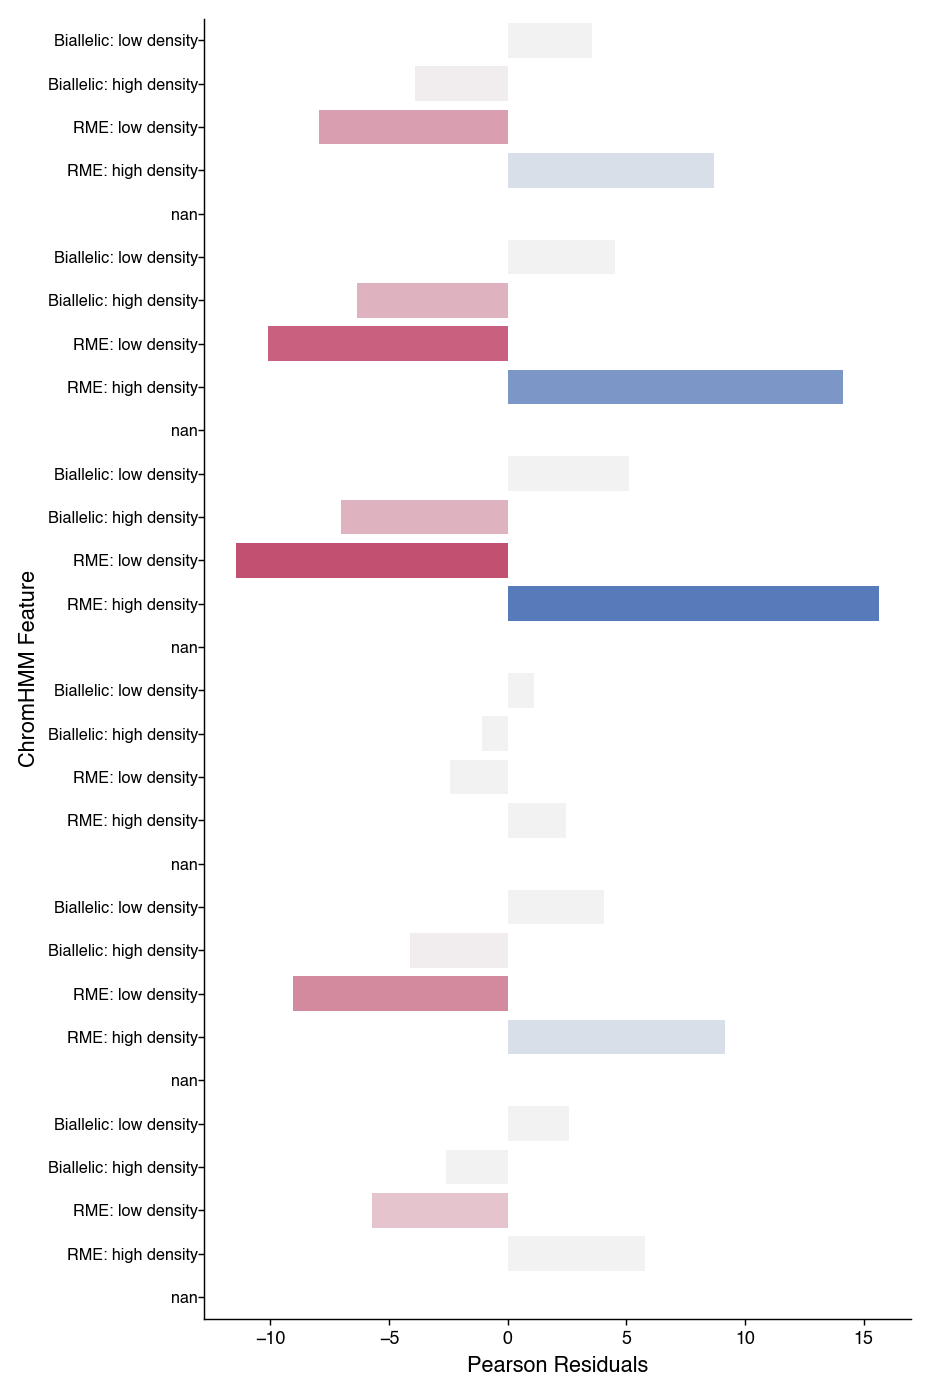

Text(0, 0.5, 'ChromHMM Feature')

In [9]:
## Load Data:
df_chromHMM = pd.read_csv('../data/ChromHMM_intragenic_bp_halves.PearsonResiduals.csv', sep=',')

## Re-shape dataframe:
df_chromHMM = df_chromHMM.melt(id_vars='ChromHMM', value_vars=['Biallelic: low density', 'Biallelic: high density', 'RME: low density', 'RME: high density', 'chisq_pval'], var_name='Density', value_name='PearsonResiduals')
#print(df_chromHMM)

## Barplots:
f, ax = plt.subplots(figsize=(4,6), tight_layout=True)
sns.despine()

def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

df_chromHMM.Density = pd.Categorical(df_chromHMM.Density, categories=['Biallelic: low density', 'Biallelic: high density', 'RME: low density', 'RME: high density'])
df_chromHMM = df_chromHMM.sort_values(by=['ChromHMM', 'Density'])
y = np.array(df_chromHMM.sort_values(by=['ChromHMM', 'Density'])['PearsonResiduals'])
df_chromHMM['order'] = np.arange(30)

## Generate Plot:
ax = sns.barplot(data=df_chromHMM.sort_values(by=['ChromHMM', 'Density']), y='order', x='PearsonResiduals', dodge=False, palette=colors_from_values(y, sns.diverging_palette(0, 255, sep=110, n=30)), orient='h')

## Formatting:
ax.set_yticklabels(labels=df_chromHMM['Density'], fontdict={'fontsize': 9,'fontweight': 'light'})
ax.tick_params(axis='y', which='major', pad=0)
ax.set_xlabel("Pearson Residuals", fontsize=12, fontweight='light')
ax.set_ylabel("ChromHMM Feature", fontsize=12, fontweight='light')

## NOTE: 'nan' values in barplot were just to generate visual spacing.


## Figure 4G: ChromHMM Core Marks per Gene

In [10]:
## Load data:
df = pd.read_csv("../data/SharedGenes_high-confidence_RegulatoryComplexity.txt", sep='\t')

df = df[df['allele_status'] != 'undefined']
df = df[~np.isnan(df['gene_length'])]

df.head()

,chr,ensembl_ID,gene_symbol,gene_start,gene_stop,total_sample_count_male,z_score_male,total_sample_count_female,z_score_female,allele_status,...,gene_length,num_ChromHMM,ChromHMM_intragenic_bp_mean,ChromHMM_intragenic_bp_per_gene,total_cRE_count_mean,perTissue_cRE_count_mean,geneHancer_count,geneName_mean,RegulatoryComplexity_pctile_mean,RegulatoryComplexity_pctile_median
3,1,ENSG00000230021.8,RP5-857K21.4,585988,827796,371,1.823233,192,1.397376,RAE,...,241808.0,7.0,1260.765957,0.005214,0.0,0.0,0.0,0.0,0.361005,0.121679
4,1,ENSG00000229344.1,MTCO2P12,632756,633438,33,-0.260950,6,-0.866394,Biallelic,...,682.0,1.0,0.000000,0.000000,0.0,0.0,1.0,25.0,0.164753,0.164753
7,1,ENSG00000228327.3,RP11-206L10.2,725884,778626,156,-0.549273,83,-0.787051,Biallelic,...,52742.0,3.0,367.454545,0.006967,0.0,0.0,0.0,0.0,0.123185,0.121679
8,1,ENSG00000237491.8,RP11-206L10.9,778769,810060,144,-0.063434,76,-0.606440,Biallelic,...,31291.0,3.0,851.000000,0.027196,0.0,0.0,0.0,0.0,0.243363,0.163841
9,1,ENSG00000230092.7,RP11-206L10.8,800878,810170,58,-0.044269,34,-0.672703,Biallelic,...,9292.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.075847,0.075847


<IPython.core.display.Javascript object>


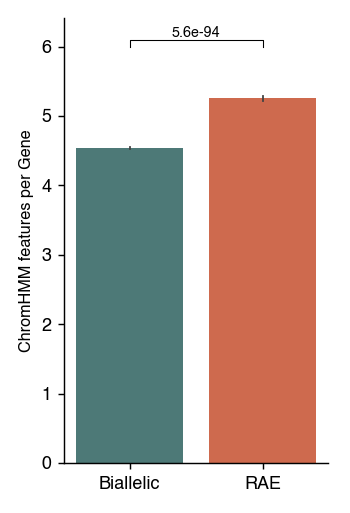

[Text(0, 0, 'Biallelic'), Text(1, 0, 'RAE')]

In [11]:
## Plot barplot of Biallelic vs. RME genes for chromHMM features per gene:
## ChromHMM data from: https://egg2.wustl.edu/roadmap/web_portal/chr_state_learning.html

f, ax = plt.subplots(figsize=(1.5, 2.2), tight_layout=True)
sns.despine()

# statistical test:
f_oneway = stats.f_oneway(df[df['allele_status'] == 'Biallelic']['num_ChromHMM'], df[df['allele_status'] == 'RAE']['num_ChromHMM'])

# Plot:
ax = sns.barplot(x='allele_status', y='num_ChromHMM', data=df, order=["Biallelic", "RAE"], palette=["#46807D","#E35E39"], linewidth=0.5, ci=68, errwidth=1)

# plot formatting
ax.plot([0, 0, 1, 1], [6, 6.1, 6.1, 6], lw=0.6, c='k')
ax.text(0.5, 6.1, "%.2g" % f_oneway.pvalue, ha='center', va='bottom', color='k', fontsize=8)
ax.set_ylabel("ChromHMM features per Gene", fontsize=9, fontweight='light')
ax.set_xlabel("")
ax.set_xticklabels(['Biallelic', 'RAE'], fontsize=10)



## Figure 4H: promoter-cRE pairs per Gene

<IPython.core.display.Javascript object>


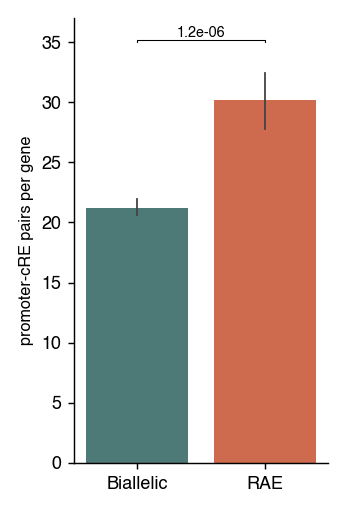

[Text(0, 0, 'Biallelic'), Text(1, 0, 'RAE')]

In [12]:
## Barplot of Biallelic vs. RAE genes for promoter-cRE pairs per gene:
## Data from "A compendium of promoter-centered long-range interactions in the human genome." (Jung et al. 2019, Nature Genetics)

f, ax = plt.subplots(figsize=(1.5, 2.2), tight_layout=True)
sns.despine()

# Statistical Test:
f_oneway = stats.f_oneway(df[df['allele_status'] == 'Biallelic']['total_cRE_count_mean'], df[df['allele_status'] == 'RAE']['total_cRE_count_mean'])

# Plot:
ax = sns.barplot(x='allele_status', y='total_cRE_count_mean', data=df, order=["Biallelic", "RAE"], palette=["#46807D","#E35E39"], linewidth=0.5, ci=68, errwidth=1)

# Formatting:
ax.plot([0, 0, 1, 1], [35, 35.2, 35.2, 35], lw=0.6, c='k')
ax.text(0.5, 35.2, "%.2g" % f_oneway.pvalue, ha='center', va='bottom', color='k', fontsize=8)
ax.set_ylabel("promoter-cRE pairs per gene", fontsize=9, fontweight='light')
ax.set_xlabel("")
ax.set_xticklabels(['Biallelic', 'RAE'], fontsize=10)


## Figure 4I: Number of Enhancers per Gene

<IPython.core.display.Javascript object>


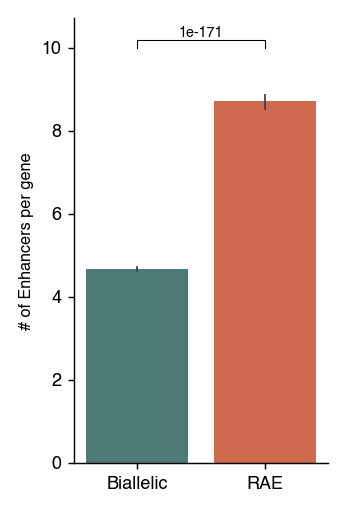

[Text(0, 0, 'Biallelic'), Text(1, 0, 'RAE')]

In [13]:
## Plot barplot of Biallelic vs. RME genes for # of Enhancers per gene:
## Data from GeneHancer Interactions (double elite) via UCSC Genome Browser (hg38)

f, ax = plt.subplots(figsize=(1.5, 2.2), tight_layout=True)
sns.despine()

# Statistical Test:
f_oneway = stats.f_oneway(df[df['allele_status'] == 'Biallelic']['geneHancer_count'], df[df['allele_status'] == 'RAE']['geneHancer_count'])

# Plot:
ax = sns.barplot(x='allele_status', y='geneHancer_count', data=df, order=["Biallelic", "RAE"], palette=["#46807D","#E35E39"], linewidth=0.5, ci=68, errwidth=1)

# Formatting:
ax.plot([0, 0, 1, 1], [10, 10.2, 10.2, 10], lw=0.6, c='k')
ax.text(0.5, 10.2, "%.2g" % f_oneway.pvalue, ha='center', va='bottom', color='k', fontsize=8)
ax.set_ylabel("# of Enhancers per gene", fontsize=9, fontweight='light')
ax.set_xlabel("")
ax.set_xticklabels(['Biallelic', 'RAE'], fontsize=10)


## Figure 4J: Regulatory Complexity Score

<IPython.core.display.Javascript object>


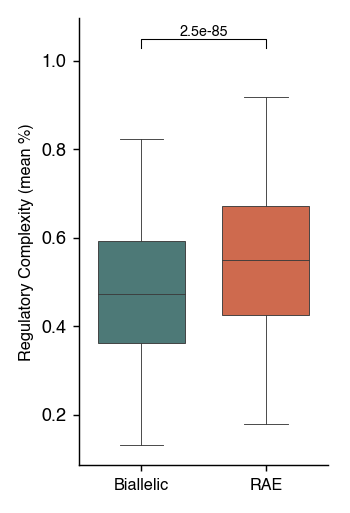

[Text(0, 0, 'Biallelic'), Text(1, 0, 'RAE')]

In [14]:
## Distribution of percentiles for RME vs. Biallelic genes: 

f, ax = plt.subplots(figsize=(1.5, 2.2), tight_layout=True)
sns.despine()

# Statistical Test:
f_oneway = stats.f_oneway(df[df['allele_status'] == 'RAE']['RegulatoryComplexity_pctile_mean'], df[df['allele_status'] == 'Biallelic']['RegulatoryComplexity_pctile_mean'])

# Plot:
ax = sns.boxplot(x='allele_status', y='RegulatoryComplexity_pctile_mean', data=df, order=["Biallelic", "RAE"], palette=["#46807D","#E35E39"], linewidth=0.5, whis=1, width=0.7, showfliers=False, fliersize=1)

# Formatting:
ax.plot([0, 0, 1, 1], [1.03, 1.05, 1.05, 1.03], lw=0.6, c='k')
ax.text(0.5, 1.05, "%.2g" % f_oneway.pvalue, ha='center', va='bottom', color='k', fontsize=8)
ax.set_ylabel("Regulatory Complexity (mean %)", fontsize=9, fontweight='light')
ax.set_xlabel("")
ax.set_xticklabels(['Biallelic', 'RAE'], fontsize=9)



## Figure 4K: Subtypes of RAE based on Candidate Mechanisms

                       Mechanism  RME_count  RME_percentage
0                    num_in_TADs       2538            77.5
1              num_high_ChromHMM       1994            61.4
2               num_gene_overlap       1692            35.0
3             num_high_enhancers       1894            56.3
4                   num_high_cRE        879            36.1
5  num_high_RegulatoryComplexity       2138            65.9


<IPython.core.display.Javascript object>


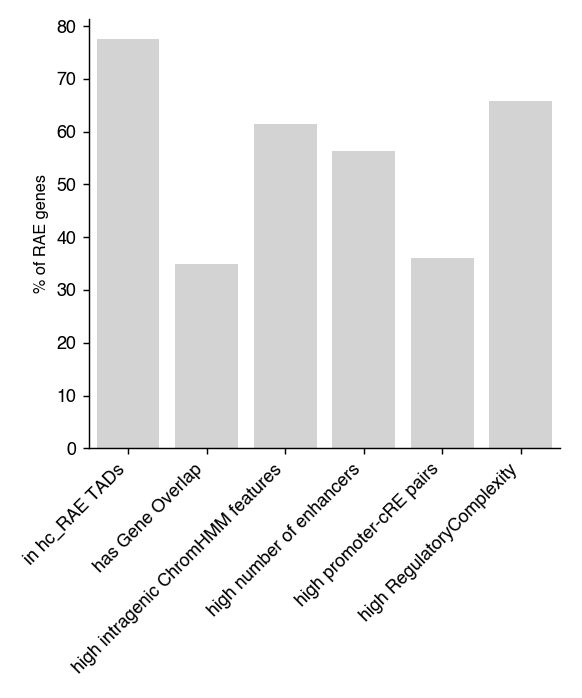

[Text(0, 0, 'in hc_RAE TADs'),
 Text(1, 0, 'has Gene Overlap'),
 Text(2, 0, 'high intragenic ChromHMM features'),
 Text(3, 0, 'high number of enhancers'),
 Text(4, 0, 'high promoter-cRE pairs'),
 Text(5, 0, 'high RegulatoryComplexity')]

In [15]:
## Load data:

df_subtypes = pd.read_csv('../data/Subtypes_Mechanisms_forBarplots.txt', sep='\t')


print(df_subtypes)

## Generate Barplot for Subtypes: 
f, ax = plt.subplots(figsize=(2.5, 3), tight_layout=True)
sns.despine()

plot_order = ['num_in_TADs', 'num_gene_overlap', 'num_high_ChromHMM', 'num_high_enhancers', 'num_high_cRE', 'num_high_RegulatoryComplexity']
labels = ['in hc_RAE TADs', 'has Gene Overlap', 'high intragenic ChromHMM features', 'high number of enhancers', 'high promoter-cRE pairs', 'high RegulatoryComplexity']

# Plot:
ax = sns.barplot(x='Mechanism', y='RME_percentage', data=df_subtypes, order=plot_order, color='lightgrey')

# Formatting:
ax.set_ylabel("% of RAE genes", fontsize=9, fontweight='light')
ax.set_xlabel("")
ax.set_xticklabels(labels=labels, rotation=45, fontsize=10, ha='right', fontweight='light')
